# American Gut OTU vs Deblur


This notebook is a part of a group of several notebooks that will explore any differences that may exist between OTU and deblur forms of analysis of the American Gut cohort.


In [79]:
# Imports dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import qiime
import pandas as pd 
import numpy as np
import scipy
import seaborn as sns

## Taxa Summaries

This notebook will examine an differences that may be evident between the taxa summaries generated from OTU and Deblur data. We will examine the two sets of data at the phylum and genus taxanomic levels (designated as "Level 2" and "Level 6" in the QIIME platform). Specifically, we will be comparing the OTU and Deblur data by looking at the relative abundances of taxa in each set of data.  

Download the OTU taxa summaries by level from the ftp site:

In [282]:
# Downloads files from ftp site 
! curl -OL ftp://ftp.microbio.me/AmericanGut/ag-June-23-2016/07-taxa/notrim/otu_table_L2.txt
! curl -OL ftp://ftp.microbio.me/AmericanGut/ag-June-23-2016/07-taxa/notrim/otu_table_L6.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3440k  100 3440k    0     0  6166k      0 --:--:-- --:--:-- --:--:-- 6165k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75.0M  100 75.0M    0     0  9053k      0  0:00:08  0:00:08 --:--:-- 10.3M


Secure copy the deblur files from barnacle using command line in terminal to establish a secure connection: scp jgeier@barnacle.ucsd.edu:/home/jona1883/scratch/AG_paper_deblurred_july_22_2016/bdiv/ag.deblur.neg.min10.withtax.bloom.filtered.biom /Users/justingeier/Documents/Justine_AG (copy the file into the same directory that contains the notebook)
Notes: (1:must be logged out of barnacle and open new terminal to copy files) (2:use scp -r to copy directory)

To generate the deblur taxa summaries by level we must run QIIME script 'summarize_taxa.py':
This will yeild a folder containing the deblur txt files generated from the .biom files that we will compare to the OTU txt files that we downloaded from the ftp site above.

In [284]:
# Generates taxa summary files
! summarize_taxa.py -i ag.deblur.neg.min10.withtax.bloom.filtered.biom -L 2,6 -o taxa_summaries

### Phylum (L2)

In order to compare the taxa in two sets of data, we will need to read the OTU .txt files into a pandas DataFrame, find the mean abundance for each taxa across all samples in the cohort, and then arrange those taxa by abundance. We will begin with OTU L2 data:

#### OTU L2

In [3]:
# Creates DataFrame from OTU table 
OTU_L2 = pd.read_csv("otu_table_L2.txt", sep='\t', skiprows=1)

In [4]:
# Sets OTU ID as the index for the Dataframe
indexed_OTU_L2 = OTU_L2.set_index("#OTU ID")

In [5]:
# Averages sample values for each #OTU ID
mean_OTU_L2 = indexed_OTU_L2.mean(axis=(1))

In [6]:
# Arranges the averages for taxa from highest relative abundance to the lowest
ordered_OTU_L2 = mean_OTU_L2.sort_values(ascending = False)

Because the top several bacteria account for most of the abundance, we will focus our analysis on these when comparing between the two sets of data. We have designated this cutoff at .01% relative abundance, which as we will see in this case, is the top 5 taxa: 

In [206]:
# Takes the top 5 taxa by abundance
top5_OTU_L2 = ordered_OTU_L2.head(n=5)
top5_OTU_L2

#OTU ID
k__Bacteria;p__Firmicutes         0.454870
k__Bacteria;p__Bacteroidetes      0.345814
k__Bacteria;p__Proteobacteria     0.122106
k__Bacteria;p__Actinobacteria     0.043194
k__Bacteria;p__Verrucomicrobia    0.017047
dtype: float64

#### Deblur L2

We will repeat the same DataFrame manipulation for the deblur data as we did with the OTU data. 

In [8]:
# Creates DataFrame from deblur data
deblur_L2 = pd.read_csv('taxa_summaries/ag.deblur.neg.min10.withtax.bloom.filtered_L2.txt', sep='\t', skiprows=1)

In [9]:
# Sets OTU ID as the index for the Dataframe
indexed_deblur_L2 = deblur_L2.set_index("#OTU ID")

In [10]:
# Averages sample values for each #OTU ID
mean_deblur_L2 = indexed_deblur_L2.mean(axis=(1))

In [11]:
# Arranges the averages for taxa from highest relative abundance to the lowest
ordered_deblur_L2 = mean_deblur_L2.sort_values(ascending = False)

In [209]:
# Takes the top 5 taxa by abundance
top5_deblur_L2 = ordered_deblur_L2.head(n=5)
top5_deblur_L2

#OTU ID
k__Bacteria;p__Firmicutes         0.471816
k__Bacteria;p__Bacteroidetes      0.355134
k__Bacteria;p__Proteobacteria     0.091301
k__Bacteria;p__Actinobacteria     0.042870
k__Bacteria;p__Verrucomicrobia    0.020618
dtype: float64

### Difference OTU - Deblur L2

We will now take the difference between the top 5 taxa by abundance for further analysis.

In [13]:
# Subtracts the values of one DataFrame from the values in the other(top 5 taxa)
L2_diff = top5_OTU_L2 - top5_deblur_L2

In [146]:
# Shows differences as a percentage
print L2_diff * 100

#OTU ID
k__Bacteria;p__Firmicutes        -1.694632
k__Bacteria;p__Bacteroidetes     -0.931996
k__Bacteria;p__Proteobacteria     3.080495
k__Bacteria;p__Actinobacteria     0.032329
k__Bacteria;p__Verrucomicrobia   -0.357104
dtype: float64


In [60]:
# Subtracts the values of one DataFrame from the values in the other (all taxa)
l2_all_diff = indexed_deblur_L2 - indexed_OTU_L2
# Replaces NaN with 0 in the same matrix
l2_all_diff.replace(np.nan, 0, inplace=True)
l2_top_diff = l2_all_diff.loc[L2_diff.index]

In [69]:
# Converts from horizontal to long form
l2_top_long = pd.DataFrame(l2_top_diff.unstack(), columns=['Difference'])
# Seperates out the bacteria as the index
l2_top_long.reset_index(inplace=True)
# Cleans up the phylum name
l2_top_long['#OTU ID'] = l2_top_long['#OTU ID'].apply(lambda x: x.replace('k__Bacteria;p__', ''))

(-0.05, 0.05)

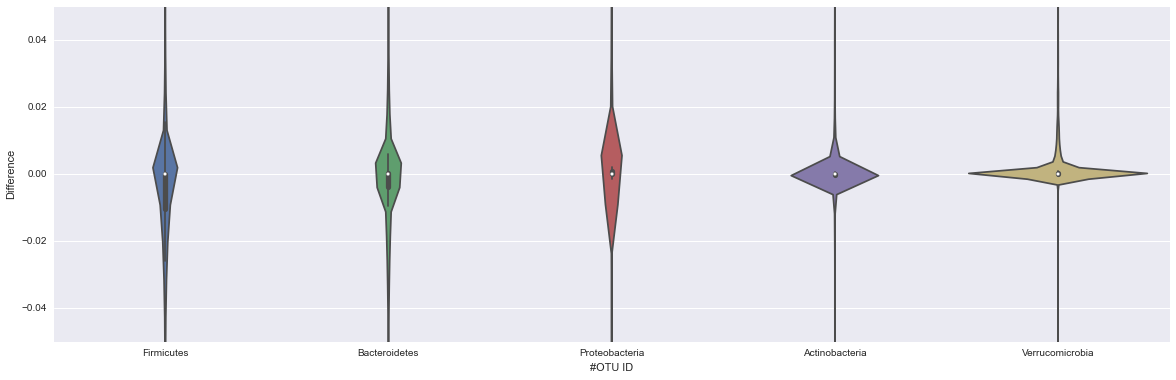

In [204]:
# Creates violin plot to visualize differences between taxa
dim2 = (20, 6)
fig, ax = plt.subplots(figsize=dim2)
sns.violinplot(x='#OTU ID', y='Difference', data=l2_top_long, ax=ax)
ax.set_ylim([-0.05, 0.05])

In [80]:
# Creates function for ttest using scipy 
def test_diff(x):
    return scipy.stats.ttest_1samp(x, 0)[1]

In [82]:
# Performs ttest on differences 
# Reject null hypothesis if value ≈ 0
l2_top_diff.apply(test_diff, axis=1)

#OTU ID
k__Bacteria;p__Firmicutes          2.273355e-56
k__Bacteria;p__Bacteroidetes       7.879961e-20
k__Bacteria;p__Proteobacteria      2.720663e-02
k__Bacteria;p__Actinobacteria      8.995866e-28
k__Bacteria;p__Verrucomicrobia    2.960531e-172
dtype: float64

### Genus (L6)

In order to compare the taxa in two sets of data, we will need to read the OTU .txt files into a pandas DataFrame, find the mean abundance for each taxa across all samples in the cohort, and then arrange those taxa by abundance. Now we will do as we did with L2 data with L6 data:

#### OTU L6

In [136]:
# Creates DataFrame from OTU table 
OTU_L6 = pd.read_csv("otu_table_L6.txt", sep='\t', skiprows=1) 

In [137]:
# Cleans up names for genus (only shows order, family, genius)
OTU_L6['#OTU ID'] = OTU_L6['#OTU ID'].apply(lambda x: x.split(';o')[1])
# Sets OTU ID as the index for the Dataframe
indexed_OTU_L6 = OTU_L6.set_index("#OTU ID") 

In [138]:
# Averages sample values for each #OTU ID
mean_OTU_L6 = indexed_OTU_L6.mean(axis=(1))

In [139]:
# Arranges the averages for taxa from highest relative abundance to the lowest
ordered_OTU_L6 = mean_OTU_L6.sort_values(ascending = False)

In [140]:
# Takes the top 15 taxa by abundance
top15_OTU_L6 = ordered_OTU_L6.head(n=15)
#Sorts values by abundance in descending order
top15_OTU_L6.sort_values(ascending=False)

#OTU ID
__Bacteroidales;f__Bacteroidaceae;g__Bacteroides              0.235135
__Clostridiales;f__Ruminococcaceae;g__                        0.077562
__Clostridiales;f__Lachnospiraceae;g__                        0.060785
__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium        0.059444
__Clostridiales;f__;g__                                       0.042829
__Bacteroidales;f__Prevotellaceae;g__Prevotella               0.034943
__Bacteroidales;f__Rikenellaceae;g__                          0.024073
__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides      0.023319
__Enterobacteriales;f__Enterobacteriaceae;g__                 0.021970
__Clostridiales;f__Ruminococcaceae;g__Ruminococcus            0.021703
__Clostridiales;f__Lachnospiraceae;g__Blautia                 0.020744
__Lactobacillales;f__Streptococcaceae;g__Streptococcus        0.019598
__Clostridiales;f__Lachnospiraceae;g__Coprococcus             0.018894
__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia    0.01687

#### Deblur L6

We will repeat the same DataFrame manipulation for the deblur data as we did with the OTU data. 

In [210]:
# Creates DataFrame from deblur table
deblur_L6 = pd.read_csv('taxa_summaries/ag.deblur.neg.min10.withtax.bloom.filtered_L6.txt', sep='\t', skiprows=1)

In [211]:
# Cleans up names for genus (only shows order, family, genius)
deblur_L6['#OTU ID'] = deblur_L6['#OTU ID'].apply(clean_otus)
# Sets OTU ID as the index for the Dataframe
indexed_deblur_L6 = deblur_L6.set_index('#OTU ID')

In [212]:
# Averages sample values for each #OTU ID
mean_deblur_L6 = indexed_deblur_L6.mean(axis=(1))

In [213]:
# Arranges the averages for taxa from highest relative abundance to the lowest
ordered_deblur_L6 = mean_deblur_L6.sort_values(ascending = False)

In [217]:
# Takes the top 15 taxa by abundance
top15_deblur_L6 = ordered_deblur_L6.head(n=15)
#Sorts values by abundance in descending order
top15_deblur_L6.sort_values(ascending=False)

#OTU ID
__Bacteroidales;f__Bacteroidaceae;g__Bacteroides              0.229402
__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium        0.093850
__Bacteroidales;f__Prevotellaceae;g__Prevotella               0.041412
__Clostridiales;f__Lachnospiraceae;g__Roseburia               0.035043
__Clostridiales;f__Ruminococcaceae;g__Oscillospira            0.031414
__Clostridiales;f__Ruminococcaceae;g__Ruminococcus            0.030938
__Bacteroidales;f__Rikenellaceae;g__                          0.028056
__Clostridiales;f__;g__                                       0.028003
__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides      0.024640
__Clostridiales;f__Lachnospiraceae;g__                        0.023719
__Clostridiales;f__Lachnospiraceae;g__Blautia                 0.021443
__Clostridiales;f__Lachnospiraceae;g__Coprococcus             0.020846
__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia    0.020458
__Lactobacillales;f__Streptococcaceae;g__Streptococcus        0.01761

### Difference OTU - Deblur L6

In [218]:
# Subtracts the values of one DataFrame from the values in the other(top 15 taxa)
L6_diff = top15_OTU_L6 - top15_deblur_L6
# Shows differences as a percentage
print L6_diff * 100

#OTU ID
__Bacteroidales;f__Bacteroidaceae;g__Bacteroides              0.573274
__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides     -0.132021
__Bacteroidales;f__Prevotellaceae;g__Prevotella              -0.646952
__Bacteroidales;f__Rikenellaceae;g__                         -0.398230
__Clostridiales;f__;g__                                       1.482601
__Clostridiales;f__Lachnospiraceae;g__                        3.706570
__Clostridiales;f__Lachnospiraceae;g__Blautia                -0.069866
__Clostridiales;f__Lachnospiraceae;g__Coprococcus            -0.195166
__Clostridiales;f__Lachnospiraceae;g__Roseburia                    NaN
__Clostridiales;f__Ruminococcaceae;g__                        6.018344
__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium       -3.440621
__Clostridiales;f__Ruminococcaceae;g__Oscillospira                 NaN
__Clostridiales;f__Ruminococcaceae;g__Ruminococcus           -0.923498
__Enterobacteriales;f__Enterobacteriaceae;g__                      Na

In [178]:
# Subtracts the values of one DataFrame from the values in the other (all taxa)
l6_all_diff = indexed_deblur_L6 - indexed_OTU_L6
# Replaces NaN with 0 in the same matrix
l6_all_diff.replace(np.nan, 0, inplace=True)
l6_top_diff = l6_all_diff.loc[L6_diff.index]

In [179]:
# Converts from horizontal to long form
l6_top_long = pd.DataFrame(l6_top_diff.unstack(), columns=['Difference'])
# Seperates out the bacteria as the index
l6_top_long.reset_index(inplace=True)
# Cleans up the phylum name
l6_top_long['#OTU ID'] = l6_top_long['#OTU ID'].apply(lambda x: x.replace('k__Bacteria;p__', ''))

(-0.05, 0.05)

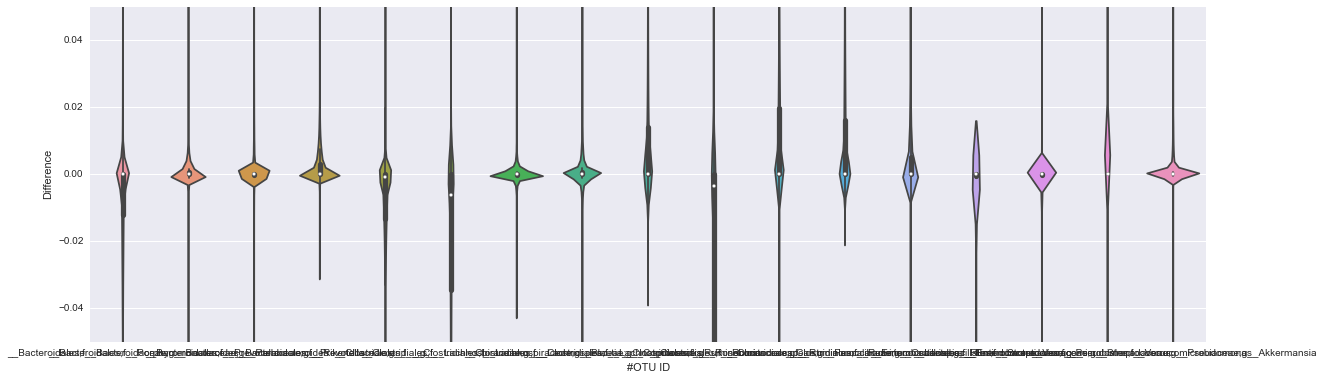

In [203]:
# Creates violin plot to visualize differences between taxa
dim6 = (20, 6)
fig, ax = plt.subplots(figsize=dim6)
sns.violinplot(x='#OTU ID', y='Difference', data=l6_top_long, ax=ax)
ax.set_ylim([-0.05, 0.05])

In [191]:
# Creates function for ttest using scipy 
def test_diff(x):
    return scipy.stats.ttest_1samp(x, 0)[1]

In [192]:
# Performs ttest on differences 
# Reject null hypothesis if value ≈ 0
l6_top_diff.apply(test_diff, axis=1)

#OTU ID
__Bacteroidales;f__Bacteroidaceae;g__Bacteroides               0.000000e+00
__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides       3.268272e-77
__Bacteroidales;f__Prevotellaceae;g__Prevotella                6.513950e-56
__Bacteroidales;f__Rikenellaceae;g__                           0.000000e+00
__Clostridiales;f__;g__                                        0.000000e+00
__Clostridiales;f__Lachnospiraceae;g__                         0.000000e+00
__Clostridiales;f__Lachnospiraceae;g__Blautia                  3.853945e-21
__Clostridiales;f__Lachnospiraceae;g__Coprococcus              1.549623e-31
__Clostridiales;f__Lachnospiraceae;g__Roseburia                0.000000e+00
__Clostridiales;f__Ruminococcaceae;g__                         0.000000e+00
__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium         0.000000e+00
__Clostridiales;f__Ruminococcaceae;g__Oscillospira             0.000000e+00
__Clostridiales;f__Ruminococcaceae;g__Ruminococcus            1.276206e-190
__En